In [2]:
import pickle
from helpers import *
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.ndimage.measurements import label

In [39]:
with open('classifier.pickle', 'rb') as handle:
    classifier = pickle.load(handle)

In [40]:
clf = classifier['clf']
scaler = classifier['scaler']

In [48]:
classifier['accuracy']

0.99549549549549554

In [41]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
from helpers import *

#dist_pickle = pickle.load( open("svc_pickle.p", "rb" ) )
svc = clf
X_scaler = scaler
color_space = 'RGB' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 0 # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off

img = cv2.imread('test_images/test5.jpg')

ystart = 400
ystop = 500
scale = 1
img_out, bboxes = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)



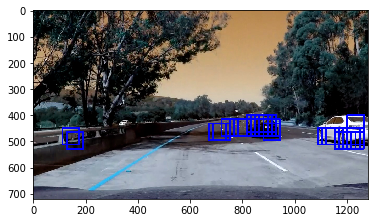

In [42]:
plt.imshow(img_out)

In [ ]:
plt.imshow(img_out2)

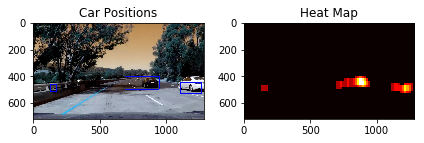

In [47]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
from scipy.ndimage.measurements import label

# Read in a pickle file with bboxes saved
# Each item in the "all_bboxes" list will contain a 
# list of boxes for one of the images shown above
#box_list = pickle.load( open( "bbox_pickle.p", "rb" ))
box_list = bboxes 
# Read in image similar to one shown above 
img = cv2.imread('test_images/test5.jpg')
heat = np.zeros_like(img[:,:,0]).astype(np.float)

# Add heat to each box in box list
heat = add_heat(heat,box_list)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,1)
# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)
# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(img), labels)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()
